<a href="https://colab.research.google.com/github/PrathikRamagiri/cats-vs-dogs/blob/main/cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dogs vs. Cats Classification

Select free T4 GPU in Runtime settings

In [1]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=12WhCCpKTWpeBztLegcoYx2gMo2KbaxDG

Downloading...
From (original): https://drive.google.com/uc?id=12WhCCpKTWpeBztLegcoYx2gMo2KbaxDG
From (redirected): https://drive.google.com/uc?id=12WhCCpKTWpeBztLegcoYx2gMo2KbaxDG&confirm=t&uuid=59b85683-db00-4afb-94d0-f46d682008a7
To: /content/dogs-vs-cats.zip
100% 852M/852M [00:05<00:00, 162MB/s]


In [2]:
import zipfile

with zipfile.ZipFile('dogs-vs-cats.zip', 'r') as zip_file:
    zip_file.extractall('data')

with zipfile.ZipFile('data/train.zip', 'r') as zip_file:
    zip_file.extractall('data/')

In [3]:
import os
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Paths
base_dir = 'data/train'
train_dir = 'data/train_split'
val_dir = 'data/val_split'

# Create directories
os.makedirs(os.path.join(train_dir, 'dogs'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'cats'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'dogs'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'cats'), exist_ok=True)

# Split data
filenames = os.listdir(base_dir)
train_files, val_files = train_test_split(filenames, test_size=0.2, random_state=42)

for file in train_files:
    if 'dog' in file:
        shutil.move(os.path.join(base_dir, file), os.path.join(train_dir, 'dogs', file))
    elif 'cat' in file:
        shutil.move(os.path.join(base_dir, file), os.path.join(train_dir, 'cats', file))

for file in val_files:
    if 'dog' in file:
        shutil.move(os.path.join(base_dir, file), os.path.join(val_dir, 'dogs', file))
    elif 'cat' in file:
        shutil.move(os.path.join(base_dir, file), os.path.join(val_dir, 'cats', file))

## Create data generators

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Load data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


## Create basic CNN classification model

In [5]:
from tensorflow.keras import models, layers

# Build the model
model_basic = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_basic.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

## Train basic model

In [6]:
history_model_basic = model_basic.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 64ms/step - accuracy: 0.6222 - loss: 0.6620 - val_accuracy: 0.7748 - val_loss: 0.4779
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 60ms/step - accuracy: 0.7794 - loss: 0.4615 - val_accuracy: 0.8056 - val_loss: 0.4308
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 0.8320 - loss: 0.3760 - val_accuracy: 0.8122 - val_loss: 0.4058
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.8561 - loss: 0.3238 - val_accuracy: 0.8368 - val_loss: 0.3853
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 0.9059 - loss: 0.2300 - val_accuracy: 0.8436 - val_loss: 0.3828
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.9427 - loss: 0.1468 - val_accuracy: 0.8440 - val_loss: 0.4581
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - accuracy: 0.9716 - loss: 0.0812 - val_accuracy: 0.8392 - val_loss: 0.5226
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 60ms/step - accuracy: 0.9813 - loss: 0.0549 - 

## Plot accuracy and loss

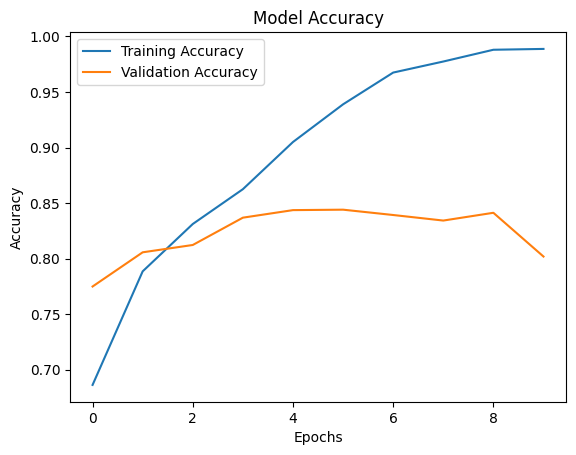

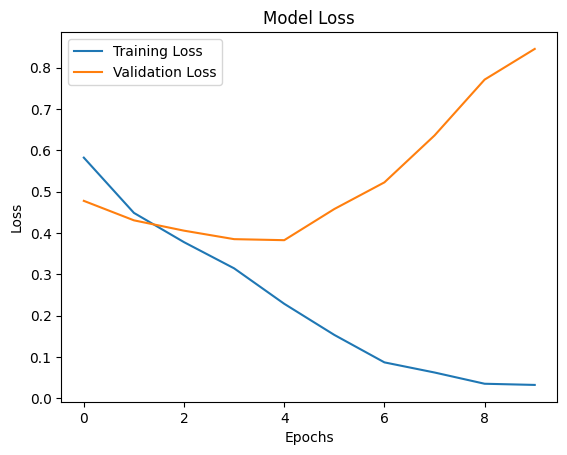

In [7]:
plt.plot(history_model_basic.history['accuracy'], label='Training Accuracy')
plt.plot(history_model_basic.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_model_basic.history['loss'], label='Training Loss')
plt.plot(history_model_basic.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Add regularization

Add different regularization methods as described in the lab instructions and evaluate results.

### Add Dropout

In [8]:
from tensorflow.keras import models, layers

# Build the model
model_dropout = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_dropout.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [9]:
history_model_dropout = model_dropout.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 61ms/step - accuracy: 0.5584 - loss: 0.6940 - val_accuracy: 0.6696 - val_loss: 0.5907
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.6929 - loss: 0.5770 - val_accuracy: 0.7302 - val_loss: 0.5532
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 0.7350 - loss: 0.5325 - val_accuracy: 0.7384 - val_loss: 0.5300
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 60ms/step - accuracy: 0.7732 - loss: 0.4714 - val_accuracy: 0.7794 - val_loss: 0.4669
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 0.8039 - loss: 0.4294 - val_accuracy: 0.8122 - val_loss: 0.4136
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.8256 - loss: 0.3874 - val_accuracy: 0.7758 - val_loss: 0.4790
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 60ms/step - accuracy: 0.8411 - loss: 0.3601 - val_accuracy: 0.8386 - val_loss: 0.3774
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.8493 - loss: 0.3432 - 

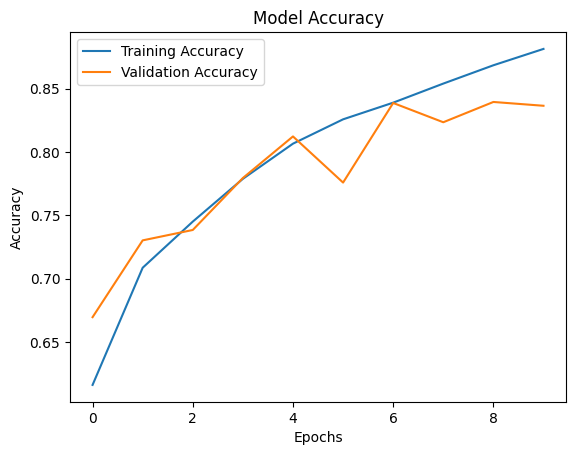

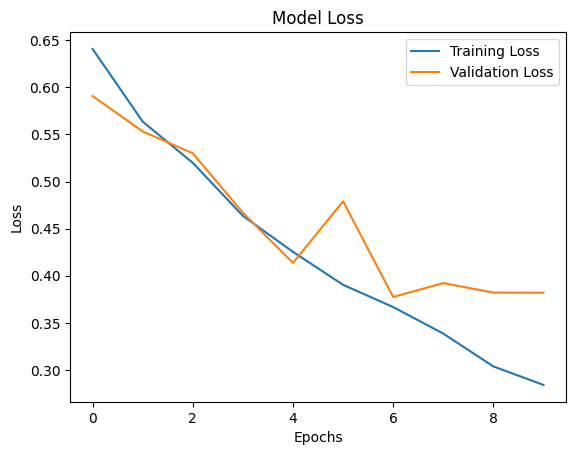

In [10]:
plt.plot(history_model_dropout.history['accuracy'], label='Training Accuracy')
plt.plot(history_model_dropout.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_model_dropout.history['loss'], label='Training Loss')
plt.plot(history_model_dropout.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
from tensorflow.keras import models, layers, regularizers

# Define the model
model_l2 = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_l2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [12]:
history_model_l2 = model_l2.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 63ms/step - accuracy: 0.5600 - loss: 0.7768 - val_accuracy: 0.6366 - val_loss: 0.6352
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.6803 - loss: 0.6133 - val_accuracy: 0.7368 - val_loss: 0.5558
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.7250 - loss: 0.5679 - val_accuracy: 0.7460 - val_loss: 0.5490
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 58ms/step - accuracy: 0.7412 - loss: 0.5498 - val_accuracy: 0.6886 - val_loss: 0.5983
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 0.7651 - loss: 0.5198 - val_accuracy: 0.7576 - val_loss: 0.5340
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 0.7881 - loss: 0.4969 - val_accuracy: 0.7290 - val_loss: 0.5663
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 60ms/step - accuracy: 0.7958 - loss: 0.4850 - val_accuracy: 0.8058 - val_loss: 0.4788
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 60ms/step - accuracy: 0.8159 - loss: 0.4623 - 

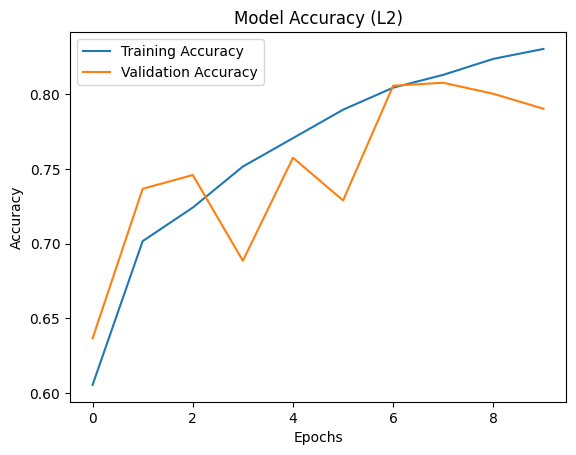

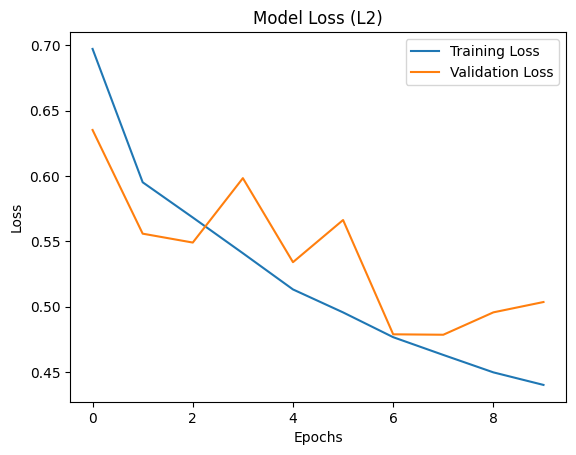

In [13]:
plt.plot(history_model_l2.history['accuracy'], label='Training Accuracy')
plt.plot(history_model_l2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy (L2)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_model_l2.history['loss'], label='Training Loss')
plt.plot(history_model_l2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (L2)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [14]:
from tensorflow.keras import models, layers, regularizers

model_combo1 = models.Sequential([
    layers.Input(shape=(150, 150, 3)),

    layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model_combo1.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [15]:
history_combo1 = model_combo1.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 63ms/step - accuracy: 0.5141 - loss: 0.9795 - val_accuracy: 0.5096 - val_loss: 0.7331
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.5129 - loss: 0.7219 - val_accuracy: 0.4944 - val_loss: 0.7074
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 0.5025 - loss: 0.7041 - val_accuracy: 0.5762 - val_loss: 0.6944
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.5415 - loss: 0.6941 - val_accuracy: 0.5838 - val_loss: 0.6887
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.5539 - loss: 0.6891 - val_accuracy: 0.6020 - val_loss: 0.6813
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 0.5581 - loss: 0.6868 - val_accuracy: 0.6002 - val_loss: 0.6802
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.5670 - loss: 0.6834 - val_accuracy: 0.5706 - val_loss: 0.6865
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.5699 - loss: 0.6850 - 

In [16]:
model_combo2 = models.Sequential([
    layers.Input(shape=(150, 150, 3)),

    layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.005)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.1),

    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.005)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.1),

    layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.005)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.1),

    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.005)),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model_combo2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [17]:
history_combo2 = model_combo2.fit(train_generator, epochs=10, validation_data=val_generator)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 62ms/step - accuracy: 0.5093 - loss: 1.0953 - val_accuracy: 0.4944 - val_loss: 0.7126
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 60ms/step - accuracy: 0.5020 - loss: 0.7059 - val_accuracy: 0.4944 - val_loss: 0.6964
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.5119 - loss: 0.6954 - val_accuracy: 0.5056 - val_loss: 0.6938
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.4912 - loss: 0.6937 - val_accuracy: 0.4944 - val_loss: 0.6933
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 0.5040 - loss: 0.6932 - val_accuracy: 0.4944 - val_loss: 0.6932
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 0.4911 - loss: 0.6932 - val_accuracy: 0.4944 - val_loss: 0.6933
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.4948 - loss: 0.6932 - val_accuracy: 0.4944 - val_loss: 0.6932
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.5000 - loss: 0.6932 - 

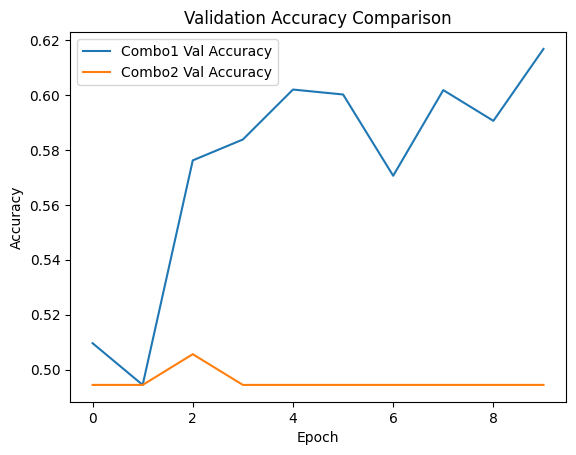

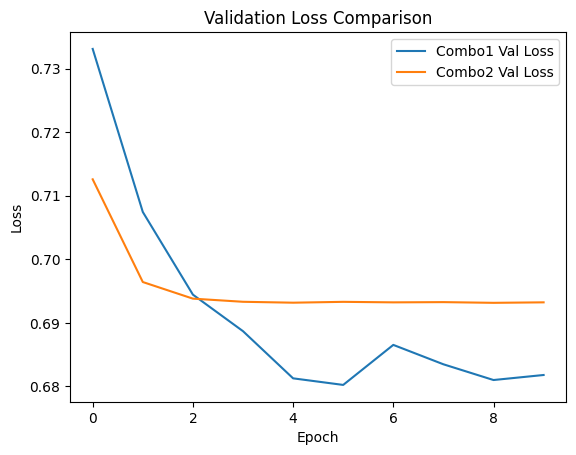

In [18]:
# Accuracy comparison
plt.plot(history_combo1.history['val_accuracy'], label='Combo1 Val Accuracy')
plt.plot(history_combo2.history['val_accuracy'], label='Combo2 Val Accuracy')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss comparison
plt.plot(history_combo1.history['val_loss'], label='Combo1 Val Loss')
plt.plot(history_combo2.history['val_loss'], label='Combo2 Val Loss')
plt.title('Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [19]:
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping
# Define the basic model
model_basic = models.Sequential([
layers.Input(shape=(150, 150, 3)),
layers.Conv2D(32, (3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(128, (3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dense(1, activation='sigmoid')
])
# Compile the model
model_basic.compile(
optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy']
)
# Create EarlyStopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history_basic = model_basic.fit(
train_generator,
epochs=10,
validation_data=val_generator,
callbacks=[early_stop]
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 62ms/step - accuracy: 0.5760 - loss: 0.6871 - val_accuracy: 0.7406 - val_loss: 0.5115
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.7568 - loss: 0.4988 - val_accuracy: 0.7972 - val_loss: 0.4390
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.8189 - loss: 0.3948 - val_accuracy: 0.7986 - val_loss: 0.4501
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.8608 - loss: 0.3182 - val_accuracy: 0.8228 - val_loss: 0.4172
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.9186 - loss: 0.2013 - val_accuracy: 0.8144 - val_loss: 0.5074
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.9618 - loss: 0.1014 - val_accuracy: 0.8226 - val_loss: 0.5557
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.9859 - loss: 0.0451 - val_accuracy: 0.8210 - val_loss: 0.7198


In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Augmented training data generator
train_augmented = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Validation data generator (no augmentation)
val_datagen = ImageDataGenerator(rescale=1./255)

# Apply generators to directories
train_aug_generator = train_augmented.flow_from_directory(
    'data/train_split',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    'data/val_split',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [23]:
from tensorflow.keras import models, layers, regularizers

# CNN with both Dropout and L2 Regularization
model_final = models.Sequential([
    layers.Input(shape=(150, 150, 3)),

    layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.3),

    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model_final.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [22]:
history_final = model_final.fit(
    train_aug_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[early_stop]
)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 140s 216ms/step - accuracy: 0.4982 - loss: 0.9418 - val_accuracy: 0.5080 - val_loss: 0.7233
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 132s 211ms/step - accuracy: 0.5459 - loss: 0.7152 - val_accuracy: 0.5554 - val_loss: 0.6985
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 131s 209ms/step - accuracy: 0.5655 - loss: 0.6950 - val_accuracy: 0.5734 - val_loss: 0.6887
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 130s 209ms/step - accuracy: 0.5646 - loss: 0.6910 - val_accuracy: 0.5794 - val_loss: 0.6831
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 209ms/step - accuracy: 0.5634 - loss: 0.6885 - val_accuracy: 0.5840 - val_loss: 0.6827
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 135s 215ms/step - accuracy: 0.5719 - loss: 0.6844 - val_accuracy: 0.6090 - val_loss: 0.6745
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 129s 207ms/step - accuracy: 0.5826 - loss: 0.6820 - val_accuracy: 0.6176 - val_loss: 0.6691
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 133s 213ms/step - accuracy: 0.5804 -

157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 91ms/step


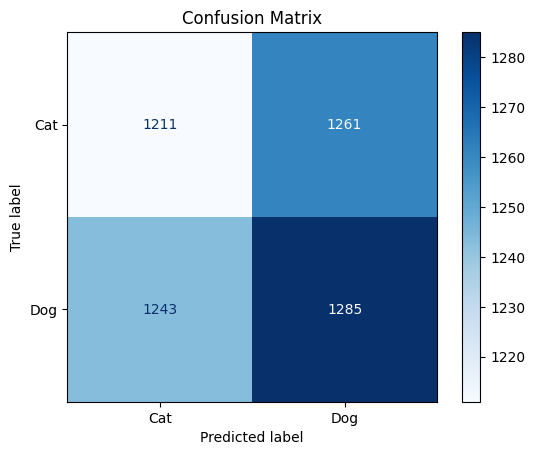

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Reset the validation generator
val_generator.reset()

# True labels
y_true = val_generator.classes

# Predict probabilities
y_pred_probs = model_basic.predict(val_generator, verbose=1)

# Convert to class predictions (0 or 1)
y_pred = (y_pred_probs > 0.5).astype("int32").flatten()

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Cat', 'Dog'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")

# Save plot
plt.savefig('confusion_matrix.png')
plt.show()


157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


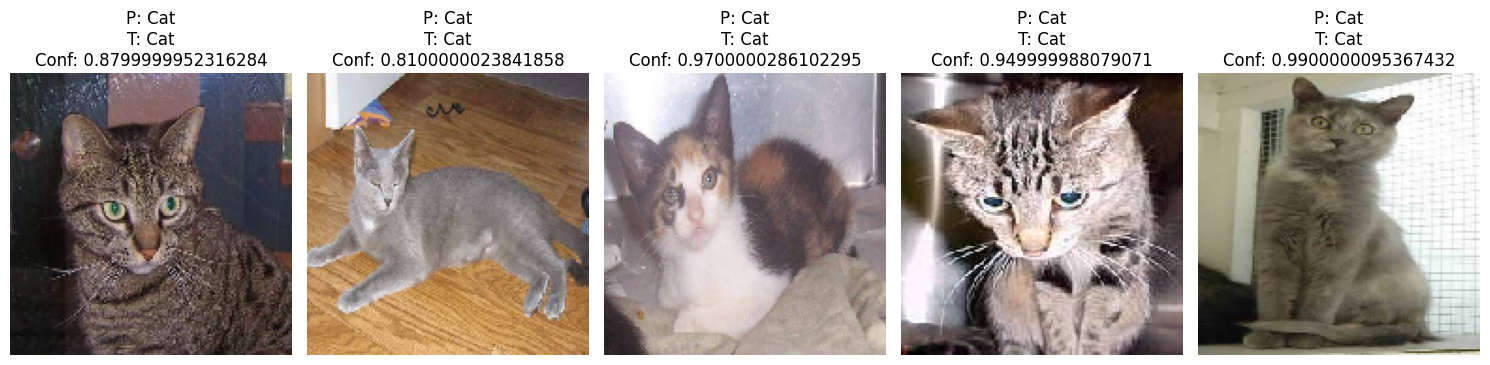

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing import image

# Get predictions
val_generator.reset()
y_pred_probs = model_basic.predict(val_generator, verbose=1)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()
y_true = val_generator.classes
filepaths = val_generator.filepaths

# Find misclassified indices
misclassified = np.where(y_pred != y_true)[0]

# Plot 5 misclassified samples
plt.figure(figsize=(15, 5))
for i, idx in enumerate(misclassified[:5]):
    # Load the image from filepath
    img_path = filepaths[idx]
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_batch = np.expand_dims(img_array, axis=0)

    # Predict
    pred = model_basic.predict(img_batch)[0][0]
    predicted_label = 'Dog' if pred > 0.5 else 'Cat'
    true_label = 'Dog' if y_true[idx] == 1 else 'Cat'
    confidence = round(pred if pred > 0.5 else 1 - pred, 2)

    # Plot
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"P: {predicted_label}\nT: {true_label}\nConf: {confidence}")

plt.tight_layout()
plt.savefig('misclassified_samples.png')
plt.show()
